In [0]:
 # !git clone https://github.com/NSCC-COGS/GDAA2030.git

Cloning into 'GDAA2030'...
remote: Enumerating objects: 181, done.
remote: Counting objects: 100% (181/181), done.
remote: Compressing objects: 100% (152/152), done.
remote: Total 181 (delta 55), reused 73 (delta 15), pack-reused 0
Receiving objects: 100% (181/181), 12.83 MiB | 21.50 MiB/s, done.
Resolving deltas: 100% (55/55), done.


In [0]:
% pip install tifffile
%cd /content/GDAA2030/tutorial2/votius/

     |████████████████████████████████| 133kB 3.3MB/s 
     |████████████████████████████████| 18.1MB 232kB/s 
/content/GDAA2030/tutorial2/votius


                                  productId  ...                                       download_url
0  LC08_L1TP_149039_20170411_20170415_01_T1  ...  https://s3-us-west-2.amazonaws.com/landsat-pds...
1  LC08_L1TP_012001_20170411_20170415_01_T1  ...  https://s3-us-west-2.amazonaws.com/landsat-pds...
2  LC08_L1TP_012002_20170411_20170415_01_T1  ...  https://s3-us-west-2.amazonaws.com/landsat-pds...
3  LC08_L1TP_012010_20170411_20170415_01_T1  ...  https://s3-us-west-2.amazonaws.com/landsat-pds...
4  LC08_L1TP_012011_20170411_20170415_01_T1  ...  https://s3-us-west-2.amazonaws.com/landsat-pds...

[5 rows x 12 columns]
0         2017-04-11 05:36:29.349932
1         2017-04-11 15:14:40.001201
2         2017-04-11 15:15:03.871058
3         2017-04-11 15:18:14.918879
4         2017-04-11 15:18:38.780265
                     ...            
1939534   2020-04-20 11:21:38.793848
1939535   2020-04-20 11:43:11.769272
1939536   2020-04-20 06:19:01.311648
1939537   2020-04-20 11:18:51.471851
1939538

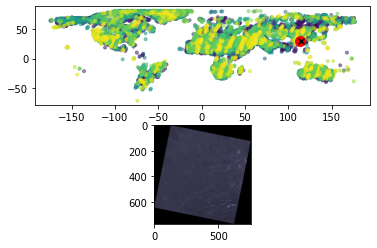

In [0]:
########################################################################
# ASSIGNMENT : Tutorial 2                                              #
# NAME       : M Kirby                                                 #
# DATE       : Feb 25 2020                                             #
########################################################################

import GDAA2030_T2_functions_MKirby as glf

# change lat and long to your location
# this current location is Wuhan, China
lat = 30.59
lon = 114.28
band = 4   # selected band
cloudCoverMax = 2
# old scene lsit
#sceneList = 'scene_list.txt'
# new scene list
sceneList = 'https://landsat-pds.s3.amazonaws.com/c1/L8/scene_list.gz'
sceneTest = None # low number or None for testing
imageDir = r'.\images'

# Loads the SceneList text file
sceneDf = glf.loadSceneList(sceneList,sceneTest,cloudCoverMax)

# Gets the path and row, prints results
path,row = glf.findPathRow(sceneDf,lat,lon)
print(path, row)

# Selects the scene with the best fit to parameters
selectedScene = glf.selectScene(sceneDf,path,row)
print(selectedScene)

# Generates the image url and path
imageUrl, imagePath = glf.getImageIO(selectedScene, band, imageDir)

# Downloads the image
glf.downloadImage(imageUrl, imagePath)

# Plots the results in matplotlib, showing a map of scenes, and your own scene
# also plots an image of your selected band

glf.plotResults(lat,lon, selectedScene, sceneDf, imagePath)